#### PCA 주성분분석


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler


In [2]:
# 1. 데이터 로드 및 준비
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [3]:
# 데이터 표준화 (PCA 적용 전 필수)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_scaled)


PCA(n_components=2)

In [11]:
# 3. 주성분 분석 결과 확인
print("고유값 (설명된 분산):", pca.explained_variance_)
print("설명된 분산 비율:", pca.explained_variance_ratio_)
print("주성분 (고유 벡터):")
for i, component in enumerate(pca.components_):
    print(f"  주성분 {i+1}: {component}")

고유값 (설명된 분산): [2.93808505 0.9201649 ]
설명된 분산 비율: [0.72962445 0.22850762]
주성분 (고유 벡터):
  주성분 1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
  주성분 2: [0.37741762 0.92329566 0.02449161 0.06694199]


#### T-SNE

In [3]:
# 손글씨 데이터 로드
digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape

In [4]:
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

In [ ]:
# 데이터 표준화 (t-SNE 적용 전 권장)
scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled.shape

(1797, 64)

In [23]:
n_components = 2
perplexity = 30.
n_iter = 300
tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=42)

In [24]:
X_embedded = tsne.fit_transform(X_scaled)

/home/augustine77/.cache/pypoetry/virtualenvs/sim-0TBU-pA2-py3.11/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


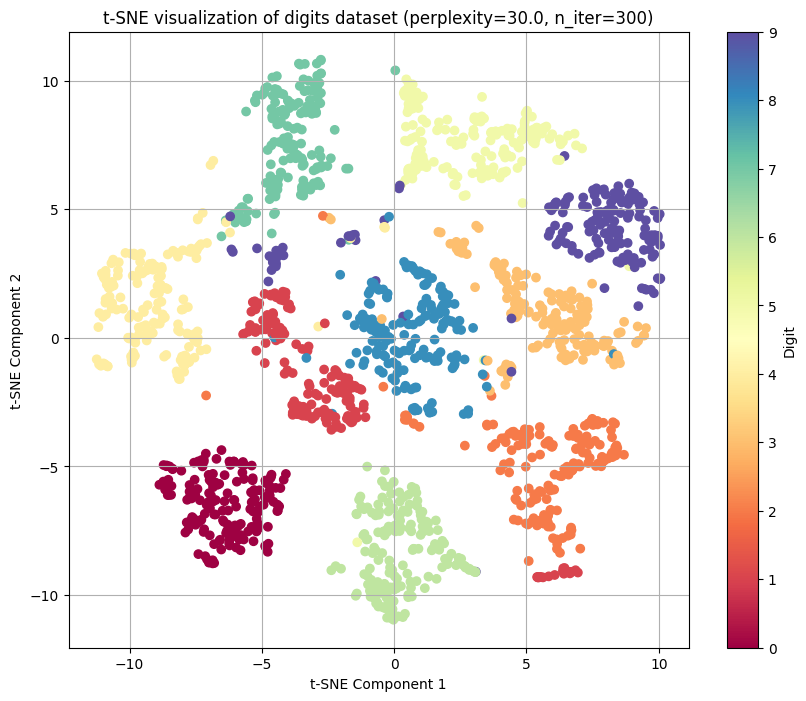

In [25]:
if n_components == 2:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='Spectral')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE visualization of digits dataset (perplexity={perplexity}, n_iter={n_iter})')
    plt.colorbar(scatter, label='Digit')
    plt.grid(True)
    plt.show()

/home/augustine77/.cache/pypoetry/virtualenvs/sim-0TBU-pA2-py3.11/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



t-SNE 3차원 임베딩 후 데이터 형태: (1797, 3)


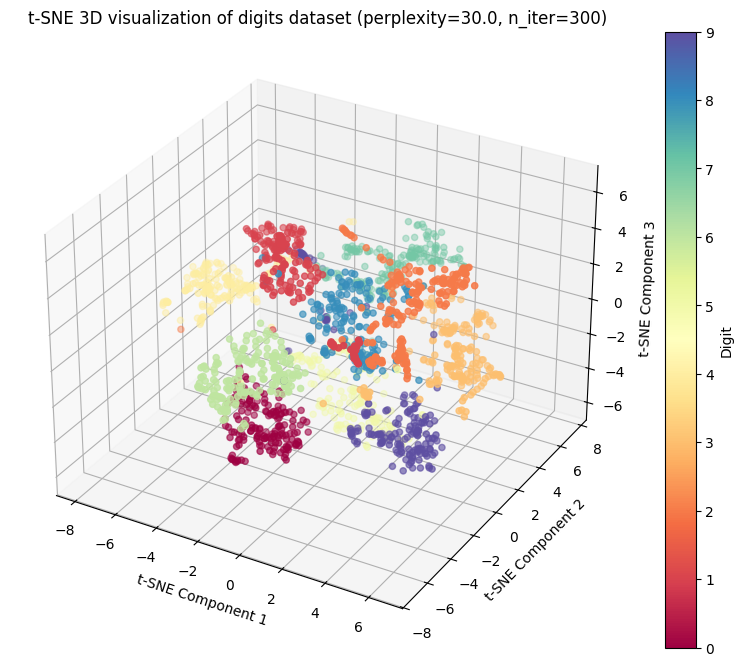

In [28]:
# 4. t-SNE 모델 생성 및 학습 (3차원으로 임베딩하는 예시)
if n_features > 3:  # 원본 데이터가 최소 4차원 이상이어야 3차원 임베딩 가능
    n_components_3d = 3
    tsne_3d = TSNE(n_components=n_components_3d, perplexity=perplexity, n_iter=n_iter, random_state=42)
    X_embedded_3d = tsne_3d.fit_transform(X_scaled)

    print("\nt-SNE 3차원 임베딩 후 데이터 형태:", X_embedded_3d.shape)

    # 5. t-SNE 결과 시각화 (3차원으로 임베딩했을 경우)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_embedded_3d[:, 0], X_embedded_3d[:, 1], X_embedded_3d[:, 2], c=y, cmap='Spectral')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    ax.set_title(f't-SNE 3D visualization of digits dataset (perplexity={perplexity}, n_iter={n_iter})')
    fig.colorbar(scatter, label='Digit')
    plt.show()
else:
    print("\n원본 데이터가 3차원 미만이므로 3차원 t-SNE 임베딩 예제를 건너뜁니다.")